## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="relu")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [7]:
"""
Compile 模型
optimizer = SGD
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0713 23:11:50.351292  7944 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 23:11:50.358293  7944 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0713 23:12:24.716258  7944 deprecation.py:323] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 23:12:24.766261  7944 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 107us/step - loss: 7.6030 - acc: 0.0998 - val_loss: 7.5326 - val_acc: 0.1000
Epoch 2/500
50000/50000 [==============================] - 5s 109us/step - loss: 7.5257 - acc: 0.1000 - val_loss: 7.5226 - val_acc: 0.1000
Epoch 3/500
50000/50000 [==============================] - 7s 137us/step - loss: 7.5223 - acc: 0.1002 - val_loss: 7.5221 - val_acc: 0.1262
Epoch 4/500
50000/50000 [==============================] - 6s 127us/step - loss: 7.5221 - acc: 0.1069 - val_loss: 7.5220 - val_acc: 0.1070
Epoch 5/500
50000/50000 [==============================] - 6s 124us/step - loss: 7.5220 - acc: 0.1159 - val_loss: 7.5219 - val_acc: 0.1043
Epoch 6/500
50000/50000 [==============================] - 7s 139us/step - loss: 7.5219 - acc: 0.1144 - val_loss: 7.5218 - val_acc: 0.1050
Epoch 7/500
50000/50000 [==============================] - 7s 131us/step - loss: 7.5218 - acc: 0.1175 - val_loss: 7.

50000/50000 [==============================] - 5s 93us/step - loss: 7.5141 - acc: 0.1845 - val_loss: 7.5138 - val_acc: 0.1890
Epoch 60/500
50000/50000 [==============================] - 5s 92us/step - loss: 7.5133 - acc: 0.1807 - val_loss: 7.5129 - val_acc: 0.1852
Epoch 61/500
50000/50000 [==============================] - 5s 93us/step - loss: 7.5124 - acc: 0.1809 - val_loss: 7.5119 - val_acc: 0.1917
Epoch 62/500
50000/50000 [==============================] - 5s 94us/step - loss: 7.5112 - acc: 0.1790 - val_loss: 7.5106 - val_acc: 0.1855
Epoch 63/500
50000/50000 [==============================] - 5s 93us/step - loss: 7.5098 - acc: 0.1819 - val_loss: 7.5091 - val_acc: 0.1889
Epoch 64/500
50000/50000 [==============================] - 5s 93us/step - loss: 7.5081 - acc: 0.1797 - val_loss: 7.5071 - val_acc: 0.1879
Epoch 65/500
50000/50000 [==============================] - 5s 94us/step - loss: 7.5059 - acc: 0.1815 - val_loss: 7.5046 - val_acc: 0.1845
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.1976 - acc: 0.1000 - val_loss: 6.1975 - val_acc: 0.1000
Epoch 119/500
50000/50000 [==============================] - 5s 93us/step - loss: 6.1975 - acc: 0.1000 - val_loss: 6.1975 - val_acc: 0.1000
Epoch 120/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.1975 - acc: 0.1000 - val_loss: 6.1974 - val_acc: 0.1000
Epoch 121/500
50000/50000 [==============================] - 5s 93us/step - loss: 6.1974 - acc: 0.0970 - val_loss: 6.1974 - val_acc: 0.0960
Epoch 122/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.1974 - acc: 0.0986 - val_loss: 6.1974 - val_acc: 0.1000
Epoch 123/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.1974 - acc: 0.0977 - val_loss: 6.1974 - val_acc: 0.1000
Epoch 124/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.1974 - acc: 0.0988 - val_loss: 6.1974 - val_acc: 0.1000
Epoch 125/500
50000/

50000/50000 [==============================] - 5s 93us/step - loss: 6.1972 - acc: 0.1476 - val_loss: 6.1972 - val_acc: 0.1331
Epoch 177/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.1972 - acc: 0.1299 - val_loss: 6.1972 - val_acc: 0.1402
Epoch 178/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.1972 - acc: 0.1291 - val_loss: 6.1972 - val_acc: 0.1484
Epoch 179/500
50000/50000 [==============================] - 5s 93us/step - loss: 6.1972 - acc: 0.1279 - val_loss: 6.1972 - val_acc: 0.1591
Epoch 180/500
50000/50000 [==============================] - 5s 95us/step - loss: 6.1972 - acc: 0.1270 - val_loss: 6.1972 - val_acc: 0.1366
Epoch 181/500
50000/50000 [==============================] - 5s 93us/step - loss: 6.1972 - acc: 0.1237 - val_loss: 6.1972 - val_acc: 0.1441
Epoch 182/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.1972 - acc: 0.1315 - val_loss: 6.1972 - val_acc: 0.1793
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 5s 93us/step - loss: 6.1970 - acc: 0.1319 - val_loss: 6.1970 - val_acc: 0.1913
Epoch 235/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.1970 - acc: 0.1473 - val_loss: 6.1970 - val_acc: 0.1461
Epoch 236/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.1970 - acc: 0.1437 - val_loss: 6.1970 - val_acc: 0.1338
Epoch 237/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.1970 - acc: 0.1400 - val_loss: 6.1970 - val_acc: 0.1552
Epoch 238/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.1970 - acc: 0.1542 - val_loss: 6.1970 - val_acc: 0.1623
Epoch 239/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.1970 - acc: 0.1474 - val_loss: 6.1970 - val_acc: 0.1661
Epoch 240/500
50000/50000 [==============================] - 5s 93us/step - loss: 6.1970 - acc: 0.1361 - val_loss: 6.1970 - val_acc: 0.1551
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 5s 95us/step - loss: 6.1967 - acc: 0.1611 - val_loss: 6.1967 - val_acc: 0.1587
Epoch 293/500
50000/50000 [==============================] - 5s 93us/step - loss: 6.1967 - acc: 0.1545 - val_loss: 6.1967 - val_acc: 0.1519
Epoch 294/500
50000/50000 [==============================] - 5s 93us/step - loss: 6.1967 - acc: 0.1455 - val_loss: 6.1967 - val_acc: 0.1781
Epoch 295/500
50000/50000 [==============================] - 5s 94us/step - loss: 6.1967 - acc: 0.1476 - val_loss: 6.1967 - val_acc: 0.2083
Epoch 296/500
50000/50000 [==============================] - 5s 93us/step - loss: 6.1967 - acc: 0.1511 - val_loss: 6.1967 - val_acc: 0.1985
Epoch 297/500
50000/50000 [==============================] - 5s 93us/step - loss: 6.1967 - acc: 0.1619 - val_loss: 6.1967 - val_acc: 0.1800
Epoch 298/500
50000/50000 [==============================] - 5s 99us/step - loss: 6.1967 - acc: 0.1404 - val_loss: 6.1966 - val_acc: 0.1526
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 8s 158us/step - loss: 6.1962 - acc: 0.1596 - val_loss: 6.1961 - val_acc: 0.1669
Epoch 351/500
50000/50000 [==============================] - 8s 158us/step - loss: 6.1961 - acc: 0.1512 - val_loss: 6.1961 - val_acc: 0.1982
Epoch 352/500
50000/50000 [==============================] - 8s 157us/step - loss: 6.1961 - acc: 0.1585 - val_loss: 6.1961 - val_acc: 0.1729
Epoch 353/500
50000/50000 [==============================] - 8s 163us/step - loss: 6.1961 - acc: 0.1362 - val_loss: 6.1961 - val_acc: 0.1677
Epoch 354/500
50000/50000 [==============================] - 8s 160us/step - loss: 6.1961 - acc: 0.1536 - val_loss: 6.1961 - val_acc: 0.1672
Epoch 355/500
50000/50000 [==============================] - 8s 165us/step - loss: 6.1961 - acc: 0.1689 - val_loss: 6.1960 - val_acc: 0.1676
Epoch 356/500
50000/50000 [==============================] - 8s 160us/step - loss: 6.1961 - acc: 0.1622 - val_loss: 6.1960 - val_acc: 0.1842
Epoch 357/500
50000/50000 [

50000/50000 [==============================] - 8s 163us/step - loss: 6.1949 - acc: 0.1527 - val_loss: 6.1948 - val_acc: 0.1727
Epoch 409/500
50000/50000 [==============================] - 8s 159us/step - loss: 6.1948 - acc: 0.1627 - val_loss: 6.1947 - val_acc: 0.1583
Epoch 410/500
50000/50000 [==============================] - 8s 162us/step - loss: 6.1948 - acc: 0.1599 - val_loss: 6.1947 - val_acc: 0.1764
Epoch 411/500
50000/50000 [==============================] - 8s 162us/step - loss: 6.1947 - acc: 0.1657 - val_loss: 6.1947 - val_acc: 0.2014
Epoch 412/500
50000/50000 [==============================] - 8s 163us/step - loss: 6.1947 - acc: 0.1696 - val_loss: 6.1946 - val_acc: 0.1672
Epoch 413/500
50000/50000 [==============================] - 8s 161us/step - loss: 6.1947 - acc: 0.1633 - val_loss: 6.1946 - val_acc: 0.1816
Epoch 414/500
50000/50000 [==============================] - 8s 163us/step - loss: 6.1946 - acc: 0.1659 - val_loss: 6.1945 - val_acc: 0.1679
Epoch 415/500
50000/50000 [

50000/50000 [==============================] - 7s 131us/step - loss: 6.1896 - acc: 0.1718 - val_loss: 6.1894 - val_acc: 0.1894
Epoch 467/500
50000/50000 [==============================] - 6s 126us/step - loss: 6.1894 - acc: 0.1678 - val_loss: 6.1892 - val_acc: 0.1873
Epoch 468/500
50000/50000 [==============================] - 6s 129us/step - loss: 6.1892 - acc: 0.1681 - val_loss: 6.1889 - val_acc: 0.1791
Epoch 469/500
50000/50000 [==============================] - 6s 127us/step - loss: 6.1889 - acc: 0.1771 - val_loss: 6.1887 - val_acc: 0.1819
Epoch 470/500
50000/50000 [==============================] - 6s 129us/step - loss: 6.1886 - acc: 0.1671 - val_loss: 6.1884 - val_acc: 0.1827
Epoch 471/500
50000/50000 [==============================] - 6s 129us/step - loss: 6.1884 - acc: 0.1667 - val_loss: 6.1881 - val_acc: 0.1859
Epoch 472/500
50000/50000 [==============================] - 6s 127us/step - loss: 6.1881 - acc: 0.1789 - val_loss: 6.1878 - val_acc: 0.1612
Epoch 473/500
50000/50000 [

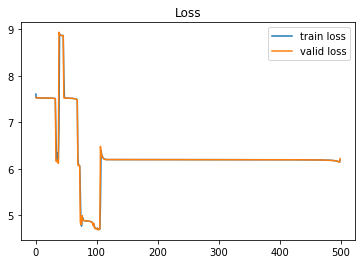

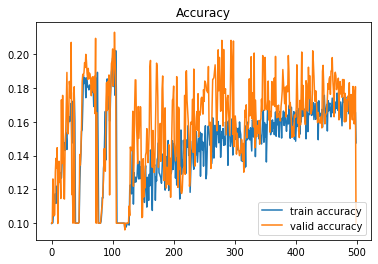

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
# 以視覺畫方式檢視訓練過程


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()